# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kezia Natalia
- **Email:** kezianatalia444@gmail.com
- **ID Dicoding:** keynatwgm

<a id="pertanyaan"></a>
<h2><b><span style="color:#005f26">🔶 Step 1 | </span><span style="color:#ff6200">Menentukan Pertanyaan Bisnis</span></b></h2>



1. Bagaimana musim (`season`) mempengaruhi penyewaan sepeda (*bike sharing*)?
2. Bagaimana pola seperti `jam`, `bulan`, `tahun` mempengaruhi penyewaan sepeda (*bike sharing*)?
3. Bagaimana cuaca (`weather_condition`)  mempengaruhi penyewaan sepeda (*bike sharing*)?
4. Apakah ada perbedaan pada penyewaan sepeda (*bike sharing*) saat hari kerja (`workingday`)?
5. Apakah ada perbedaan pada penyewaan sepeda (*bike sharing*) saat hari libur (`holiday`)?
6. Bagaimana pengaruh variabel seperti `temp`,`atemp`, `humidity`, dan `windspeed` terhadap penyewaan sepeda (*bike sharing*)?
7. Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?







<a id="importdata"></a>
<h2><b><span style="color:#005f26">1.1 | </span><span style="color:#ff6200">Import Packages/Library</span></b></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns

!pip install datetime
from datetime import datetime
import calendar

<a id="Data Wrangling"></a>
<h2><b><span style="color:#005f26">🔶 Step 2 | </span><span style="color:#ff6200">Data Wrangling</span></b></h2>

<a id="gatheringdata"></a>
<h2><b><span style="color:#005f26">2.1 | </span><span style="color:#ff6200">Gathering Data</span></b></h2>

<a id="import"></a>
<h3><b><span style="color:#005f26">2.1.1 | </span><span style="color:#ff6200">Import and Load Tabel</span></b></h3>

##### Load tabel **hour**

In [2]:
hour_df = pd.read_csv("Data/hour.csv")
print(hour_df.shape)
hour_df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dapat dilihat dari dataset `hour_df` memiliki jumlah **17379** baris dan **17** kolom

##### Load tabel **day**

In [3]:
day_df = pd.read_csv("Data/day.csv")
print(day_df.shape)
day_df.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dapat dilihat dari dataset `day_df` memiliki jumlah **731** baris dan **16** kolom

<a id="assesingdata"></a>
<h2><b><span style="color:#005f26">2.2 | </span><span style="color:#ff6200">Assesing Data</span></b></h2>

<a id="nilai hour"></a>
<h3><b><span style="color:#005f26">2.2.1 | </span><span style="color:#ff6200">Menilai Data hour_df</span></b></h3>

Kita memeriksa tipe data data dari tiap kolom yang terdapat dalam **hour_df**. Proses ini dapat dilakukan menggunakan method `info()`

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



1. Jika kita perhatikan, jumlah data pada `hour_df` telah lengkap atau dengan kata lain tidak ada **missing value** didalamnya.
2. Terdapat kesalahan tipe data yang tidak sesuai seperti kolom `dteday` yang bertipe data **object** yang seharusnya bertipe data **datetime**.




In [6]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

3. Kita akan mengubah nama kolom agar lebih mudah di pahami.

In [7]:
# renaming the columns
hour_df.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'cnt':'count'
    },inplace=True)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   workingday         17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

4. Kemudian kita akan mengganti tipe data dari **int64** menjadi tipe data **categorical** dari kolom dibawah ini
    * `season`
    * `year`
    * `month`
    * `hour`
    * `holiday`
    * `weekday`
    * `workingday`
    * `wheater_condition`


In [8]:
#Type casting the numerical attributes to category
hour_df['season']=hour_df.season.astype('category') # categorical conversion
hour_df['year']=hour_df.year.astype('category')
hour_df['month']=hour_df.month.astype('category')
hour_df['holiday']=hour_df.holiday.astype('category')
hour_df['weekday']=hour_df.weekday.astype('category')
hour_df['workingday']=hour_df.workingday.astype('category')
hour_df['weather_condition']=hour_df.weather_condition.astype('category')

hour_df.info() # data information after typecasting and datetime conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   workingday         17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


<a id="menilai day"></a>
<h3><b><span style="color:#005f26">2.2.1 | </span><span style="color:#ff6200">Menilai Data day_df</span></b></h3>

Kita memeriksa tipe data - data dari tiap kolom yang terdapat dalam **day_df**. Proses ini dapat dilakukan menggunakan method `info()`

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


1. Jika kita perhatikan, jumlah data pada `day_df` telah lengkap atau dengan kata lain tidak ada **missing value** didalamnya.
2. Terdapat kesalahan tipe data yang tidak sesuai seperti kolom `dteday` yang bertipe data **object** yang seharusnya bertipe data **datetime**.




In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

3. Kita akan mengubah nama kolom agar lebih mudah di pahami.

In [13]:
# renaming the columns
day_df.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'cnt':'count'
    },inplace=True)

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weather_condition  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

4. Kemudian kita akan mengganti tipe data dari **int64** menjadi tipe data **categorical** dari kolom dibawah ini
    * `season`
    * `year`
    * `month`
    * `hour`
    * `holiday`
    * `weekday`
    * `workingday`
    * `wheater_condition`


In [14]:
#Type casting the numerical attributes to category
day_df['season']=day_df.season.astype('category') # categorical conversion
day_df['year']=day_df.year.astype('category') # categorical conversion
day_df['month']=day_df.month.astype('category') # categorical conversion
day_df['holiday']=day_df.holiday.astype('category') # categorical conversion
day_df['weekday']=day_df.weekday.astype('category') # categorical conversion
day_df['workingday']=day_df.workingday.astype('category') # categorical conversion
day_df['weather_condition']=day_df.weather_condition.astype('category')

day_df.info() # data information after typecasting and datetime conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    category      
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   weekday            731 non-null    category      
 7   workingday         731 non-null    category      
 8   weather_condition  731 non-null    category      
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

In [15]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


<a id="cleaning"></a>
<h2><b><span style="color:#005f26">3.1 | </span><span style="color:#ff6200">Cleaning Data</span></b></h2>



1. Karena pada tahap **Assessing Data** telah dilakukan pengecekan bahwa **tidak terdapat** missing value dan duplicate data pada tabel `hour_df` dan `day_df`, maka untuk proses **Cleaning Data** kita akan masuk ke langkah selanjutnya yaitu **merge** atau menggabungkan tabel `hour_df` dan `day_df`
2. Setelah dilakukan **merge** kita akan melakukan pengecekan apakah DataFrame dari merge `hour_df` dan `day_df` memiliki missing value ataupun data duplicate

3. Dari pengamatan saya bahwa `hour_df` adalah data per jam dari dataset *bike sharing* dan `day_df` adalah dataset harian.
4. Jika kita mengelompokkan data berdasarkan tanggal (kolom `datetime`) di `hour_df`, kita akan menemukan bahwa jumlah `total_count` atau `registered` atau `casual` memiliki nilai yang sama dengan nilai-nilai di `day_df`.

In [16]:
hour_df.groupby('date')['count'].sum()

date
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: count, Length: 731, dtype: int64

Dapat dilihat perbandingan nilai yang menunjukkan bahwa `hour_df` dan `day_df` memiliki jumlah hari yang sama yaitu **731** hari dari 2011-01-01 sampai 2012-12-31

In [17]:
bike_sharing_df = day_df.merge(hour_df[['date', 'hour']], on='date', how='inner')
print(bike_sharing_df.shape)

(17379, 17)


1. Kita menggabungkan tabel `hour_df` dan `day_df` menggunakan **inner join** yaitu proses join yang hanya mengambil nilai yang bersesuaian di kedua tabel. Pada kasus ini, kita menggabungkan DataFrame `day_df` dengan subset dari `hour_df` berdasarkan kolom `datetime` sebagai kolom yang bersesuaian.
2. Pada DataFrame `hour_df`, kita hanya memilih kolom `datetime` dan `hour`
3. Mengapa kita menggabungkan tabel `hour_df` dengan `day_df`? Karena setelah melalui pengamatan saya `hour_df` adalah data per jam dari dataset bike sharing dan `day_df` adalah dataset harian serta kedua tabel memiliki data yang sama, yang menjadi pembeda hanya 1 kolom `hour` di tabel `hour_df`

In [18]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   holiday            17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   workingday         17379 non-null  category      
 8   weather_condition  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

In [19]:
# bike_sharing_df.head()
bike_sharing_df.loc[bike_sharing_df["date"].isnull()] # Checking for Null Values in 'datetime' Column
bike_sharing_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,4


In [20]:
bike_sharing_df.isnull().sum()

instant              0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
count                0
hour                 0
dtype: int64

Tidak ada **missing value**

In [21]:
print("Jumlah duplikasi: ", bike_sharing_df.duplicated().sum())

Jumlah duplikasi:  0


Kita akan membuang atau drop kolom `instant` karena indeks catatan ini tidak memberikan informasi tambahan yang berguna

In [22]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   holiday            17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   workingday         17379 non-null  category      
 8   weather_condition  17379 non-null  category      
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

Kita akan memperbaiki nilai dari kolom `season`, `weekday`, `month`, `year`, dan `weather_condition` sesuai dengan ketentuan dataset

In [23]:
#changing the values to real names of seasons from provvided data set
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].cat.rename_categories({ 0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
bike_sharing_df['weekday'].unique()

['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [24]:
bike_sharing_df.head(4)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,1,0,1,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,1,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,1,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,1,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3


In [25]:
bike_sharing_df["month"] = bike_sharing_df["month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

In [26]:
bike_sharing_df.head(4)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3


In [27]:
#changing the values to real names of seasons from provvided data set
bike_sharing_df['season'] = bike_sharing_df['season'].cat.rename_categories({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_sharing_df['season'].unique()

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

In [28]:
bike_sharing_df.head(4)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3


In [29]:
#changing the values to real names of seasons from provvided data set
bike_sharing_df['year'] = bike_sharing_df['year'].cat.rename_categories({0: 2011, 1: 2012})
bike_sharing_df['year'].unique()

[2011, 2012]
Categories (2, int64): [2011, 2012]

In [30]:
bike_sharing_df.head(4)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,3


In [31]:
#changing the values to real names of seasons from provvided data set
bike_sharing_df['weather_condition'] = bike_sharing_df['weather_condition'].cat.rename_categories({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'})
bike_sharing_df['weather_condition'].unique()

['Mist + Cloudy', 'Clear', 'Light Snow']
Categories (3, object): ['Clear', 'Mist + Cloudy', 'Light Snow']

In [32]:
bike_sharing_df.head(4)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3


In [33]:
#changing the values to real names of seasons from provvided data set
bike_sharing_df['holiday'] = bike_sharing_df['holiday'].cat.rename_categories({0: 'Not Holiday', 1: 'Holiday'})
bike_sharing_df['holiday'].unique()

['Not Holiday', 'Holiday']
Categories (2, object): ['Not Holiday', 'Holiday']

In [34]:
bike_sharing_df.head(4)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3


In [35]:
#changing the values to real names of seasons from provvided data set
bike_sharing_df['workingday'] = bike_sharing_df['workingday'].cat.rename_categories({0: 'Holiday', 1: 'Working Day'})
bike_sharing_df['workingday'].unique()

['Holiday', 'Working Day']
Categories (2, object): ['Holiday', 'Working Day']

In [36]:
bike_sharing_df.head(4)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,1
2,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,2
3,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,3


In [37]:
print('bike_sharing_df Unique Value')
print(f'season            : {bike_sharing_df.season.unique()}')
print(f'year              : {bike_sharing_df.year.unique()}')
print(f'holiday           : {bike_sharing_df.holiday.unique()}')
print(f'workingday        : {bike_sharing_df.workingday.unique()}')
print(f'weekday           : {bike_sharing_df.weekday.unique()}')
print(f'weather_condition : {bike_sharing_df.weather_condition.unique()}\n')

bike_sharing_df Unique Value
season            : ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
year              : [2011, 2012]
Categories (2, int64): [2011, 2012]
holiday           : ['Not Holiday', 'Holiday']
Categories (2, object): ['Not Holiday', 'Holiday']
workingday        : ['Holiday', 'Working Day']
Categories (2, object): ['Holiday', 'Working Day']
weekday           : ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
weather_condition : ['Mist + Cloudy', 'Clear', 'Light Snow']
Categories (3, object): ['Clear', 'Mist + Cloudy', 'Light Snow']



<a id="denormalisasi"></a>
<h2><b><span style="color:#005f26">3.1.1 | </span><span style="color:#ff6200">Denormalize Numeric Value</span></b></h2>

In [38]:
bike_sharing_df.temp = bike_sharing_df.temp.multiply(41)
bike_sharing_df.atemp = bike_sharing_df.atemp.multiply(50)
bike_sharing_df.humidity = bike_sharing_df.humidity.multiply(100)
bike_sharing_df.windspeed = bike_sharing_df.windspeed.multiply(67)

In [39]:
bike_sharing_df.head(4)

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,2
3,1,2011-01-01,Spring,2011,Jan,Not Holiday,Sat,Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,3


<a id="EDA"></a>
<h2><b><span style="color:#005f26">🔶 Step 3 | </span><span style="color:#ff6200">Exploratory Data Analysis (EDA)</span></b></h2>

<a id="explore"></a>
<h2><b><span style="color:#005f26">3.1 | </span><span style="color:#ff6200">Explore `bike_sharing_df`</span></b></h2>

In [40]:
bike_sharing_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,17379.000000,17379,17379,17379.0,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,May,Not Holiday,Sat,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,16879,2512,11865,11040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.376474,23.788756,62.722884,12.736539,854.339720,3679.353242,4533.692963,11.546752
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.000000
25%,185.000000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.940000,16.918150,52.000000,9.041650,318.000000,2545.000000,3214.000000,6.000000
50%,367.000000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.602500,24.506100,62.583300,12.124789,724.000000,3681.000000,4563.000000,12.000000
75%,549.000000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.889153,30.524400,72.958300,15.624668,1100.000000,4801.000000,5986.000000,18.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,23.000000


Melihat distribusi dan jumlah data untuk data kategorikal, yaitu `season`, `year`, `month`, `holiday`, `workingday`, `weekday`, dan `weather_condition`.

In [41]:
print('bike_sharing_df Data Distribution\n')
print(f'{bike_sharing_df.season.value_counts().sort_index()}\n')
print(f'{bike_sharing_df.year.value_counts().sort_index()}\n')
print(f'{bike_sharing_df.month.value_counts().sort_index()}\n')
print(f'{bike_sharing_df.holiday.value_counts().sort_index()}\n')
print(f'{bike_sharing_df.workingday.value_counts().sort_index()}\n')
print(f'{bike_sharing_df.weekday.value_counts().sort_index()}\n')
print(f'{bike_sharing_df.weather_condition.value_counts().sort_index()}\n')

bike_sharing_df Data Distribution

season
Spring    4242
Summer    4409
Fall      4496
Winter    4232
Name: count, dtype: int64

year
2011    8645
2012    8734
Name: count, dtype: int64

month
Jan    1429
Feb    1341
Mar    1473
Apr    1437
May    1488
Jun    1440
Jul    1488
Aug    1475
Sep    1437
Oct    1451
Nov    1437
Dec    1483
Name: count, dtype: int64

holiday
Not Holiday    16879
Holiday          500
Name: count, dtype: int64

workingday
Holiday         5514
Working Day    11865
Name: count, dtype: int64

weekday
Sun    2502
Mon    2479
Tue    2453
Wed    2475
Thu    2471
Fri    2487
Sat    2512
Name: count, dtype: int64

weather_condition
Clear            11040
Mist + Cloudy     5871
Light Snow         468
Name: count, dtype: int64



1. Hubungan antara musim (`season`) dengan jumlah penyewa sepeda harian

In [42]:
bike_sharing_df.groupby(by='season').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})

,casual,registered,count
season,,,
Spring,1440508,9738639,11179147
Summer,4880685,17143386,22024071
Fall,5413876,20006927,25420803
Winter,3112501,17054528,20167029


Berdasarkan hasil analisis diatas, para penyewa sepeda baik `Casual` maupun `Registered`, suka sekali pada musim gugur (`Fall`), dapat dilihat dari jumlah penyewanya. Sedangkan yang paling sedikit adalah pada musim dingin (`Winter`) dengan jumlah penyewa yang paling kecil.

2. Pola berdasarkan waktu (`month`, `hour`) dengan jumlah penyewa sepeda

In [43]:
bike_sharing_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
        max   min         mean      sum
month                                  
Jan    4521   431  2228.370189  3184341
Feb    5062  1005  2671.260999  3582161
Mar    8362   605  3709.164969  5463600
Apr    7460   795  4484.418928  6444110
May    8294  2633  5349.774194  7960464
Jun    8120  3767  5772.366667  8312208
Jul    8173  3285  5563.677419  8278752
Aug    7865  1115  5689.239322  8391628
Sep    8714  1842  5772.107864  8294519
Oct    8156    22  5319.965541  7719270
Nov    6852  1495  4245.956159  6101439
Dec    6606   441  3411.030344  5058558

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar yaitu bulan **June** dan jumlah terbanyak adalah bulan **Agustus**. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan **January**.

In [44]:
bike_sharing_df.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
       max  min         mean      sum
hour                                 
0     8714   22  4524.359504  3284685
1     8714  441  4533.084254  3281953
2     8714  441  4561.169231  3261236
3     8714  441  4615.865136  3217258
4     8714  441  4642.246772  3235646
5     8714  441  4565.804742  3273682
6     8714  441  4531.057931  3285017
7     8714  441  4526.061898  3290447
8     8714  441  4526.061898  3290447
9     8714  441  4526.061898  3290447
10    8714  441  4526.061898  3290447
11    8714  441  4526.061898  3290447
12    8714  441  4520.782967  3291130
13    8714  441  4516.085048  3292226
14    8714  441  4516.085048  3292226
15    8714  441  4516.085048  3292226
16    8714  431  4510.489041  3292657
17    8714  431  4510.489041  3292657
18    8714  431  4520.653846  3291036
19    8714  431  4520.653846  3291036
20    8714  431  4520.653846  3291036
21    8714  431  4520.653846  3291036
22    8714  431  4520.653846  3291036
23    8714  431  4520.653846  3291036

Berdasarkan hasil diatas, dapat disimpulkan bahwa jam yang memiliki dan jumlah terbanyak pada pukul **16** dan **17** atau jam 4 dan 5 sore. Sedangkan jumlah terkecil pada pukul **3** pagi.

3. Pengaruh cuaca (`weather_condition`) terhadap jumlah penyewa sepeda

In [45]:
bike_sharing_df.groupby(by='weather_condition').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
                    max  min         mean       sum
weather_condition                                  
Clear              8714  431  4895.177083  54042755
Mist + Cloudy      8362  605  4062.717595  23852215
Light Snow         4639   22  1914.700855    896080

Berdasarkan hasil diatas, dapat disimpulkan bahwa : 
* Para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah (`Clear`). 
* Ketika cuaca mendung dan kabut (`Mist + Cloudy`), penyewa sepeda juga banyak tetapi berada pada posisi kedua setelah kondisi cuaca cerah. 
* Kemudian penyewa sepeda sangat sedikit ketika cuaca turun salju (`Light Snow`)

4. Pengaruh antara hari kerja (`workingday`), hari libur (`holiday`) dan `weekday` terhadap jumlah penyewa sepeda

In [46]:
# Berdasarkan `workingday`
bike_sharing_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
              max  min         mean       sum
workingday                                   
Holiday      8714  605  4341.834059  23940873
Working Day  8362   22  4622.855204  54850177

Berdasarkan hasil diatas, jumlah dan rata-rata penyewa sepeda terbesar pada kategori **Working Day** atau hari kerja dibandingkan dengan **Holiday** atau hari non-workingday

In [47]:
# Berdasarkan `Holiday`
bike_sharing_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                             
              max   min         mean       sum
holiday                                       
Not Holiday  8714    22  4556.906215  76916020
Holiday      7403  1000  3750.060000   1875030

Berdasarkan hasil diatas, jumlah dan rata-rata penyewa sepeda terbesar pada kategori **Not Holiday** atau bukan hari kerja dibandingkan dengan **Holiday** 

In [48]:
# Berdasarkan `Weekday`
bike_sharing_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                             
          max   min         mean       sum
weekday                                   
Sun      8227   605  4239.505995  10607244
Mon      7525    22  4391.920936  10887572
Tue      7767   683  4566.708113  11202135
Wed      8173   441  4574.609293  11322158
Thu      7804   431  4703.503440  11622357
Fri      8362  1167  4700.838359  11690985
Sat      8714   627  4561.544188  11458599

Berdasarkan hasil diatas, jumlah penyewa sepeda terbesar pada hari **Jumat** dan untuk rata rata terbanyak pada hari **Kamis**

5. Pengaruh variabel `temp`, `atemp`, `humidity`, `windspeed` berdasarkan season

In [49]:
bike_sharing_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'humidity': ['max', 'min', 'mean'],
    'windspeed': ['max', 'min', 'mean']
})

temp                           atemp                       \
              max        min       mean       max       min       mean   
season                                                                   
Spring  23.472500   2.424346  12.265011  27.43085   3.95348  14.905824   
Summer  33.141653  10.374763  22.331192  37.87895  12.51695  26.027348   
Fall    35.328347  19.235847  28.962815  42.04480  12.12000  32.800176   
Winter  26.957500   9.054153  17.348658  30.39875  11.39565  20.786888   

       humidity                      windspeed                       
            max      min       mean        max       min       mean  
season                                                               
Spring  94.8261   0.0000  58.134842  34.000021  3.042356  14.412185  
Summer  92.2500  25.4167  62.702198  26.000489  4.417256  13.628491  
Fall    93.9565  36.0000  63.316726  25.166339  4.292744  11.496711  
Winter  97.2500  33.3478  66.712429  28.292425  1.500244  11.444846

Berdasarkan hasil analisis diatas, dapat disimpulkan beberapa pernyataan sebagai berikut:
1. Rata-rata temperatur dan atemp tertinggi terjadi pada **musim gugur** (`fall season`) yang selanjutnya diikuti oleh summer, winter, dan spring.
2. Rata-rata humidity tertinggi terjadi pada **musim dingin** (`winter season`) yang selanjutnya diikuti oleh fall, summer, dan spring.
3. Rata-rata windspeed tertinggi terjadi pada **musim semi** (`spring season`) yang selanjutnya diikuti oleh summer, fall, dan winter

6. Tahun yang lebih unggul dalam penyewaan sepeda

In [50]:
bike_sharing_df.groupby(by=["year"], observed=False).agg({
    "casual": ["max", "min", "sum"],
    "registered": ["max", "min", "sum"]
})

casual              registered               
        max min      sum        max  min       sum
year                                              
2011   3065   9  5908412       4614  416  23756856
2012   3410   2  8939158       6946   20  40186624

Berdasarkan hasil analisis diatas, dapat disimpulkan bahwa tahun 2012 **lebih unggul** dari tahun 2011

In [51]:
df_year = bike_sharing_df.groupby('year').instant.nunique().reset_index()
df_year.rename(columns={'instant': 'sum'}, inplace=True)
df_year

,year,sum
0,2011,365
1,2012,366


7. Hubungan antara penyewa casual, registered denan total_count

Text(0.5, 1.0, 'Correlation Heatmap')

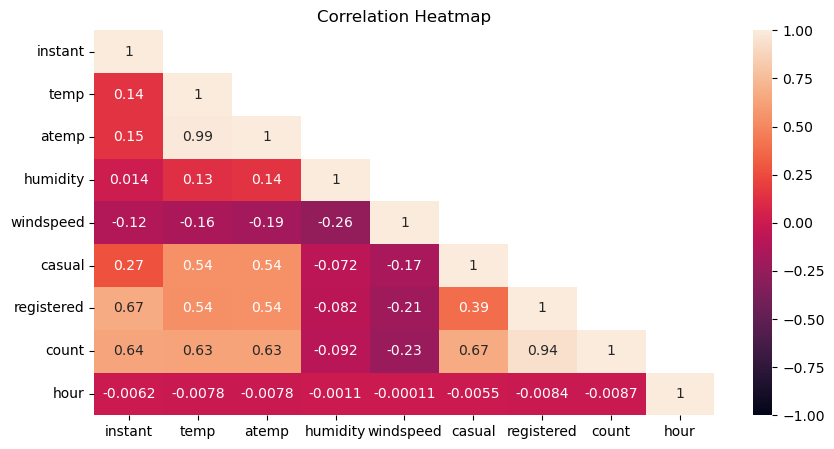

In [52]:
# visualisasi correlation setiap kolom numerik menggunakan heatmap
plt.figure(figsize=(10, 5))

# Explicitly select numerical columns
num_cols = bike_sharing_df.select_dtypes(include=['int64', 'float64'])

heatmap = sns.heatmap(num_cols.corr(), vmin=-1, vmax=1, annot=True, mask=np.triu(num_cols.corr(), k=1))
heatmap.set_title('Correlation Heatmap')

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:

* `atemp` dan `temp` sangat berkorelasi (0.99).
* `humidity` memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
* `casual` cukup berkorelasi dengan `temp` dan `atemp` (0.54), dan sedikit negatif dengan `humidity` (-0.072).
* `registered` memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan `casual` (0.39).
* `total_count` berkorelasi kuat dengan `temp`, `atemp`, `casual`, dan `registered` (0.63, 0.63, 0.67, dan 0.94), dan sedikit negatif dengan `humidity` (-0.092).

<a id="Visualization"></a>
<h2><b><span style="color:#005f26">🔶 Step 4 | </span><span style="color:#ff6200">Visualization & Explanatory Analysis</span></b></h2>

### Pertanyaan 1: Bagaimana musim (season) mempengaruhi penyewaan sepeda (bike sharing)?

In [53]:
df_season = bike_sharing_df.groupby('season').instant.nunique().reset_index()
df_season.rename(columns={'instant': 'sum'}, inplace=True)
df_season

,season,sum
0,Spring,181
1,Summer,184
2,Fall,188
3,Winter,178


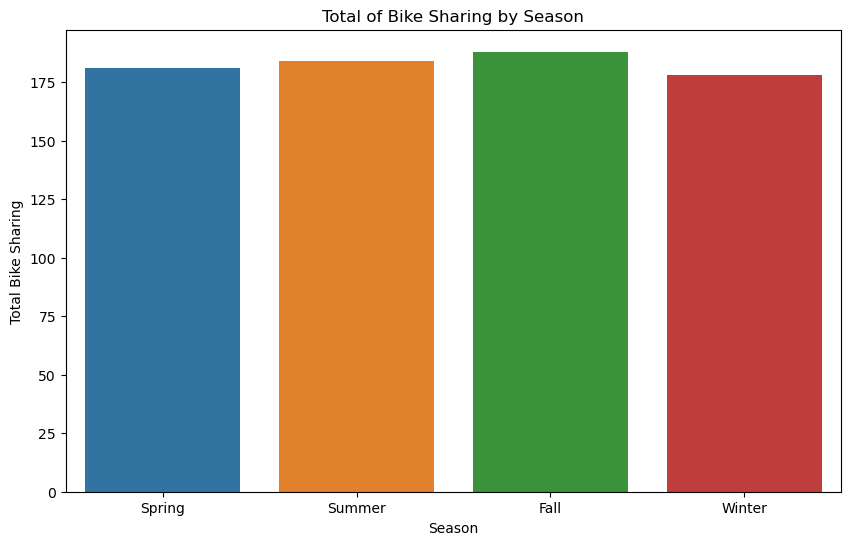

In [54]:
plt.figure(figsize=(10,6))

# Create a barplot using the sns.barplot() function
sns.barplot(
    data=df_season.sort_values('season', ascending=False),
    x = 'season',
    y = 'sum',
)
# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Bike Sharing")
plt.title("Total of Bike Sharing by Season")

# Show the plot
plt.show()

Dari barplot diatas dapat dilihat bahwa jumlah penyewa sepeda harian lebih banyak pada musim **Fall** (musim gugur) kemudian diikuti musim **summer** (musim panas)

### Pertanyaan 2: Bagaimana pola seperti jam, bulan, tahun mempengaruhi penyewaan sepeda (bike sharing)?

#### Berdasarkan jam `hour`

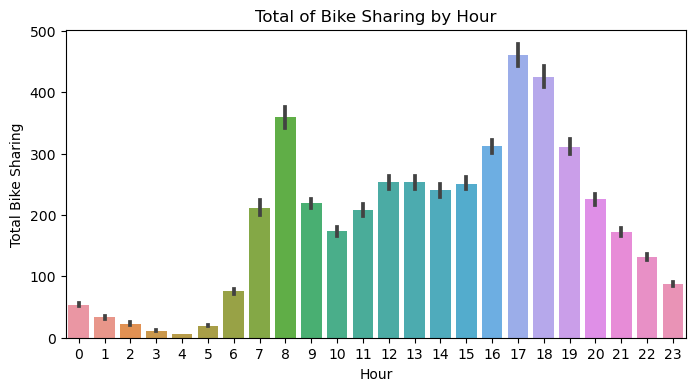

In [55]:
plt.figure(figsize=(8, 4))
# Create a barplot using the sns.barplot() function
sns.barplot(
    data = hour_df.sort_values('hour', ascending=False),
    x = 'hour',
    y = 'count',
)
# Add labels and a title to the plot
plt.title('Total of Bike Sharing by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Bike Sharing')
plt.show()

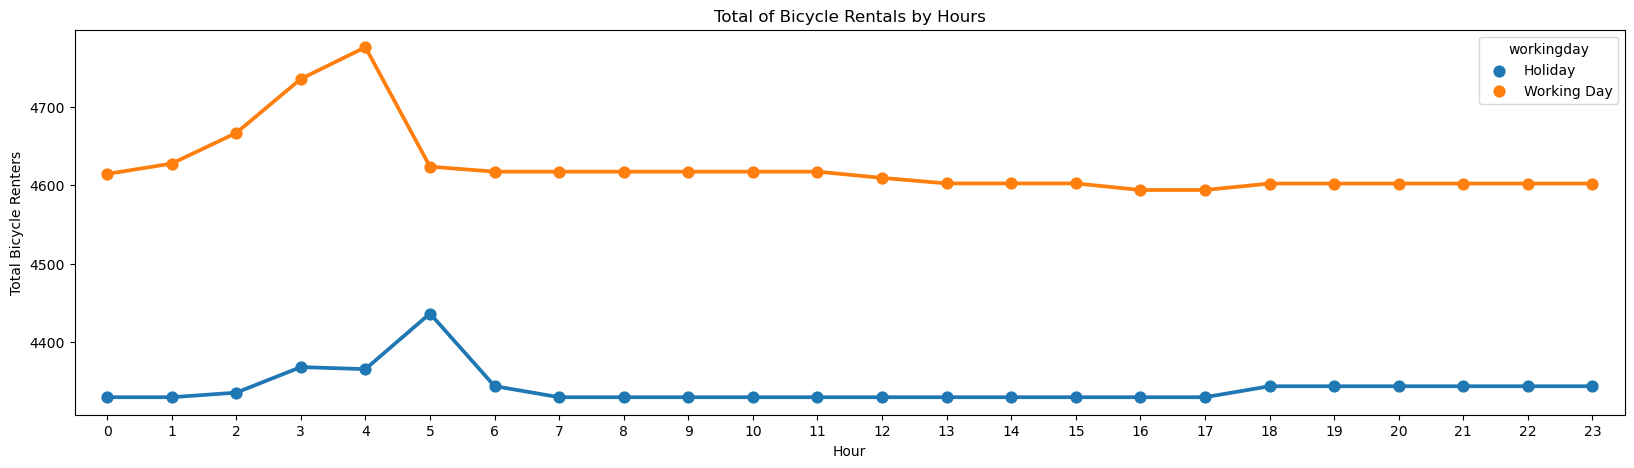

In [56]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=bike_sharing_df, x='hour', y='count', hue='workingday', errorbar=None, ax=ax)
ax.set(title='Total of Bicycle Rentals by Hours')
ax.set_ylabel('Total Bicycle Renters')
ax.set_xlabel('Hour')
plt.show()

Dari visualisasi diatas terlihat untuk kategori `working day` total penyewa sepeda mulai naik pada pukul 2 sampai puncaknya pada pukul 4. Untuk kategori `holiday` total penyewa sepeda mulai naik pada pukul 2 sampai puncaknya pada pukul 5 

##### Berdasarkan `month`

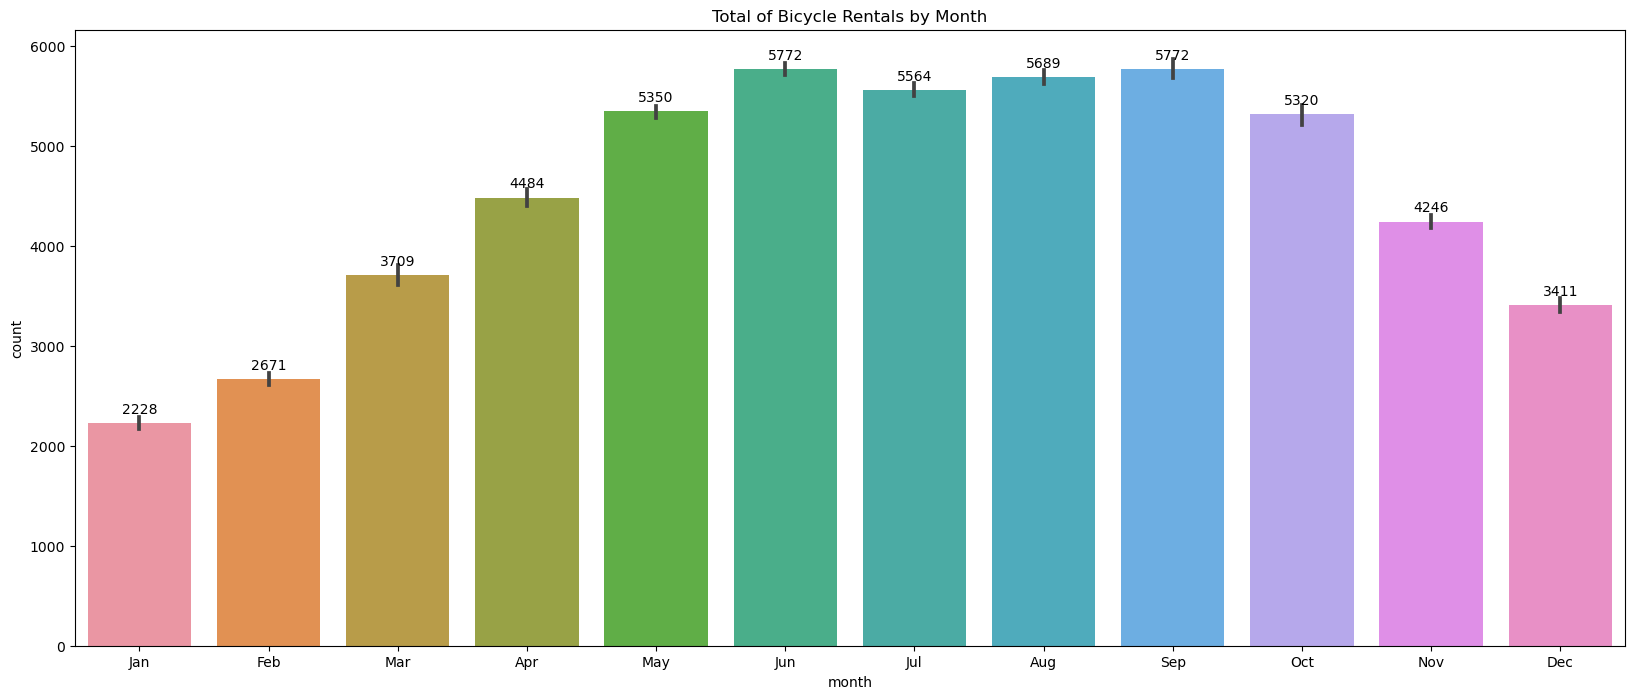

In [57]:
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plot bar
sns.barplot(
    x = 'month', 
    y = 'count', 
    data = bike_sharing_df[
        ['month', 'count']
    ], ax=ax1)

# Anotasi untuk menampilkan setiap nilai
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                 textcoords='offset points')

ax1.set_title('Total of Bicycle Rentals by Month')
plt.show()


#### Berdasarkan tahun `year`

In [58]:
df_year = bike_sharing_df.groupby('year').instant.nunique().reset_index()
df_year.rename(columns={'instant': 'sum'}, inplace=True)
df_year

,year,sum
0,2011,365
1,2012,366


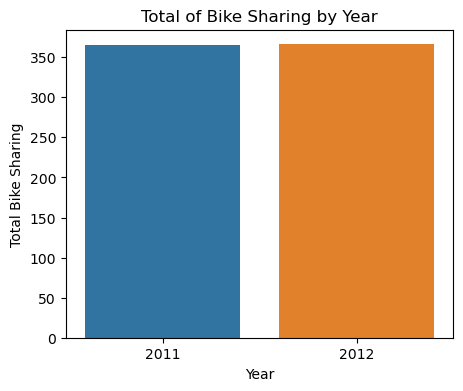

In [59]:
plt.figure(figsize=(5, 4))
# Create a barplot using the sns.barplot() function
sns.barplot(
    data=df_year.sort_values('year', ascending=False),
    x='year',
    y='sum',
)

# Add labels and a title to the plot
plt.title('Total of Bike Sharing by Year')
plt.xlabel('Year')
plt.ylabel('Total Bike Sharing')
plt.show()

#### Berdasarkan hari  `weekday`

In [60]:
sum_casual_user = bike_sharing_df.groupby("weekday").casual.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,weekday,casual
0,Sat,3690876
1,Sun,3356919
2,Fri,1875835
3,Mon,1692494
4,Thu,1473676
5,Tue,1384586
6,Wed,1373184


In [61]:
sum_registered_user = bike_sharing_df.groupby("weekday").registered.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,weekday,registered
0,Thu,10148681
1,Wed,9948974
2,Tue,9817549
3,Fri,9815150
4,Mon,9195078
5,Sat,7767723
6,Sun,7250325


In [62]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="weekday",
    right_on="weekday"
)
daily_user

,weekday,casual,registered
0,Sat,3690876,7767723
1,Sun,3356919,7250325
2,Fri,1875835,9815150
3,Mon,1692494,9195078
4,Thu,1473676,10148681
5,Tue,1384586,9817549
6,Wed,1373184,9948974


In [63]:
daily_user_type = daily_user.melt(id_vars='weekday', var_name='user_type', value_name='user_count')
daily_user_type

,weekday,user_type,user_count
0,Sat,casual,3690876
1,Sun,casual,3356919
2,Fri,casual,1875835
3,Mon,casual,1692494
4,Thu,casual,1473676
5,Tue,casual,1384586
6,Wed,casual,1373184
7,Sat,registered,7767723
8,Sun,registered,7250325
9,Fri,registered,9815150


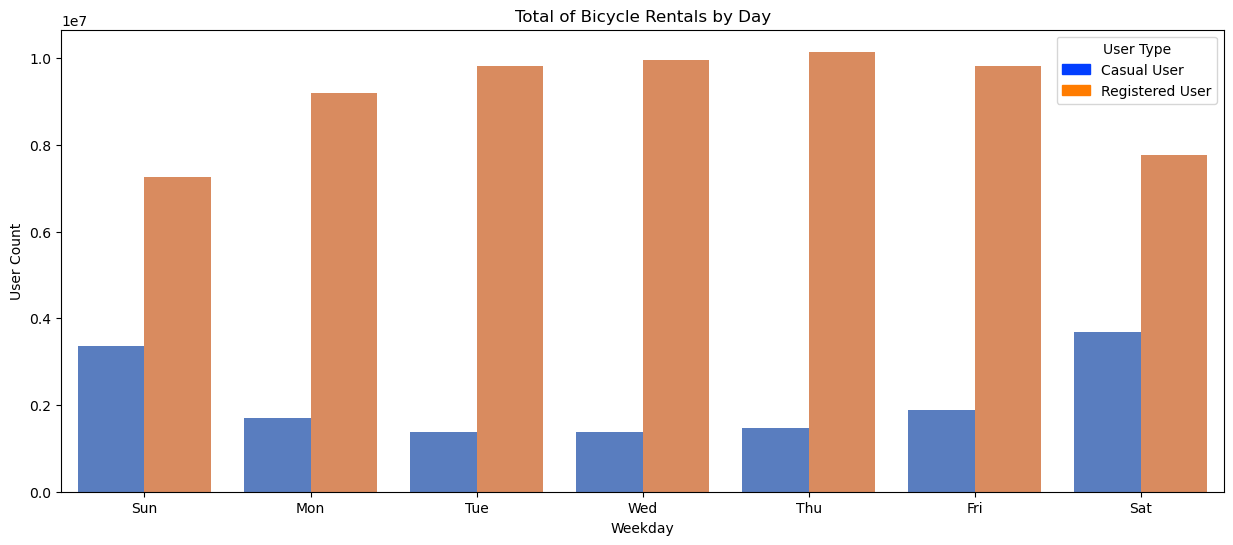

In [64]:
plt.figure(figsize=(15, 6))


sns.barplot(x="weekday", y="user_count", hue="user_type", data=daily_user_type, palette="muted")
plt.ylabel("User Count")
plt.xlabel("Weekday")
plt.title("Total of Bicycle Rentals by Day")
casual_patch = mpatches.Patch(color=sns.color_palette("bright")[0], label='Casual User')
registered_patch = mpatches.Patch(color=sns.color_palette("bright")[1], label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

Dari visualisasi di atas terlihat bahwa setiap harinya pengguna Bike Sharing dengan tipe `registered user` memiliki jumlah **lebih banyak** dibandingkan pengguna dengan tipe `casual user`.

Jika dilihat berdasarkan masing-masing jenis pengguna, pengguna dengan tipe `casual user` paling banyak pada hari Sabtu dengan total hampir mendekati 4.000.000 pengguna. Sedangkan pengguna tipe `registered_user` paling banyak pada hari Kamis dengan total lebih dari 10.000.000 pengguna.

### Pertanyaan 3: Bagaimana cuaca (weather_condition)  mempengaruhi penyewaan sepeda (bike sharing)?

In [65]:
df_weathercond = bike_sharing_df.groupby('weather_condition').instant.nunique().reset_index()
df_weathercond.rename(columns={'instant': 'sum'}, inplace=True)
df_weathercond

,weather_condition,sum
0,Clear,463
1,Mist + Cloudy,247
2,Light Snow,21


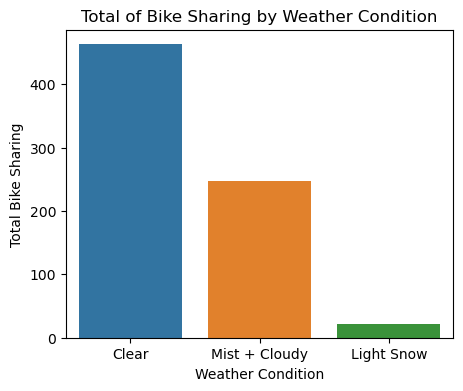

In [66]:
plt.figure(figsize=(5, 4))
# Create a barplot using the sns.barplot() function
sns.barplot(
    data=df_weathercond.sort_values('weather_condition', ascending=False),
    x = 'weather_condition',
    y = 'sum',
)
# Add labels and a title to the plot
plt.title('Total of Bike Sharing by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bike Sharing')
plt.show()

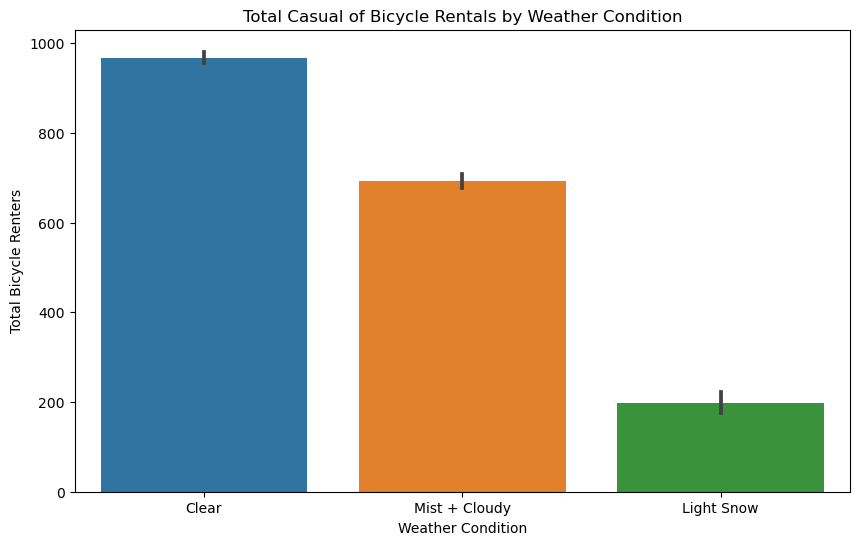

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_condition',
    y='casual',
    data=bike_sharing_df)

plt.title('Total Casual of Bicycle Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bicycle Renters')
plt.show()

Berdasarkan visualisasi diatas, pengguna penyewa sepeda dengan kategori `casual` lebih menyukai kondisi cuaca yang **cerah** atau `cleary`

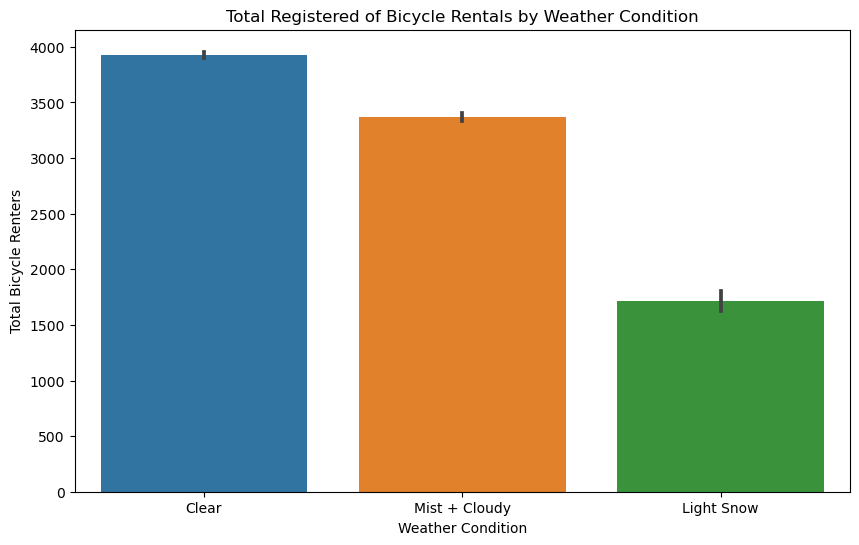

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_condition',
    y='registered',
    data=bike_sharing_df)

plt.title('Total Registered of Bicycle Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bicycle Renters')
plt.show()

Berdasarkan visualisasi diatas, pengguna penyewa sepeda dengan kategori registered lebih menyukai kondisi cuaca yang **cerah** atau `cleary`

### Pertanyaan 4: Apakah ada perbedaan pada penyewaan sepeda (bike sharing) saat hari kerja (workingday)?

In [69]:
df_workingday = bike_sharing_df.groupby('workingday').instant.nunique().reset_index()
df_workingday.rename(columns={'instant': 'sum'}, inplace=True)
df_workingday

,workingday,sum
0,Holiday,231
1,Working Day,500


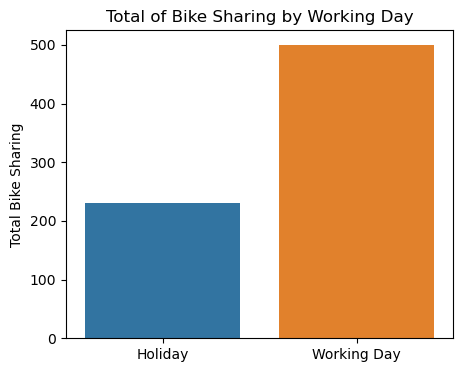

In [70]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_workingday.sort_values('workingday', ascending=False),
    x = 'workingday',
    y = 'sum',
)

plt.title('Total of Bike Sharing by Working Day')
plt.xlabel(None)
plt.ylabel('Total Bike Sharing')
plt.show()

### Pertanyaan 5 : Apakah ada perbedaan pada penyewaan sepeda (bike sharing) saat hari libur (holiday)?

In [71]:
df_holiday = bike_sharing_df.groupby('holiday').instant.nunique().reset_index()
df_holiday.rename(columns={'instant': 'sum'}, inplace=True)
df_holiday

,holiday,sum
0,Not Holiday,710
1,Holiday,21


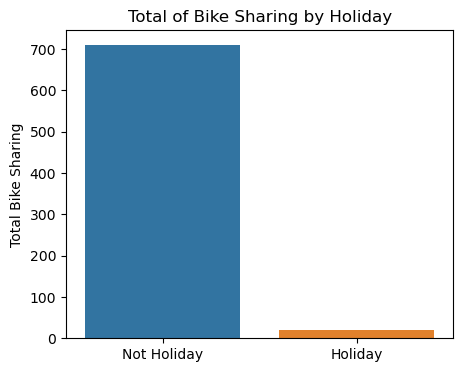

In [72]:
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_holiday.sort_values('holiday', ascending=False),
    x = 'holiday',
    y = 'sum',
)

plt.title('Total of Bike Sharing by Holiday')
plt.xlabel(None)
plt.ylabel('Total Bike Sharing')
plt.show()

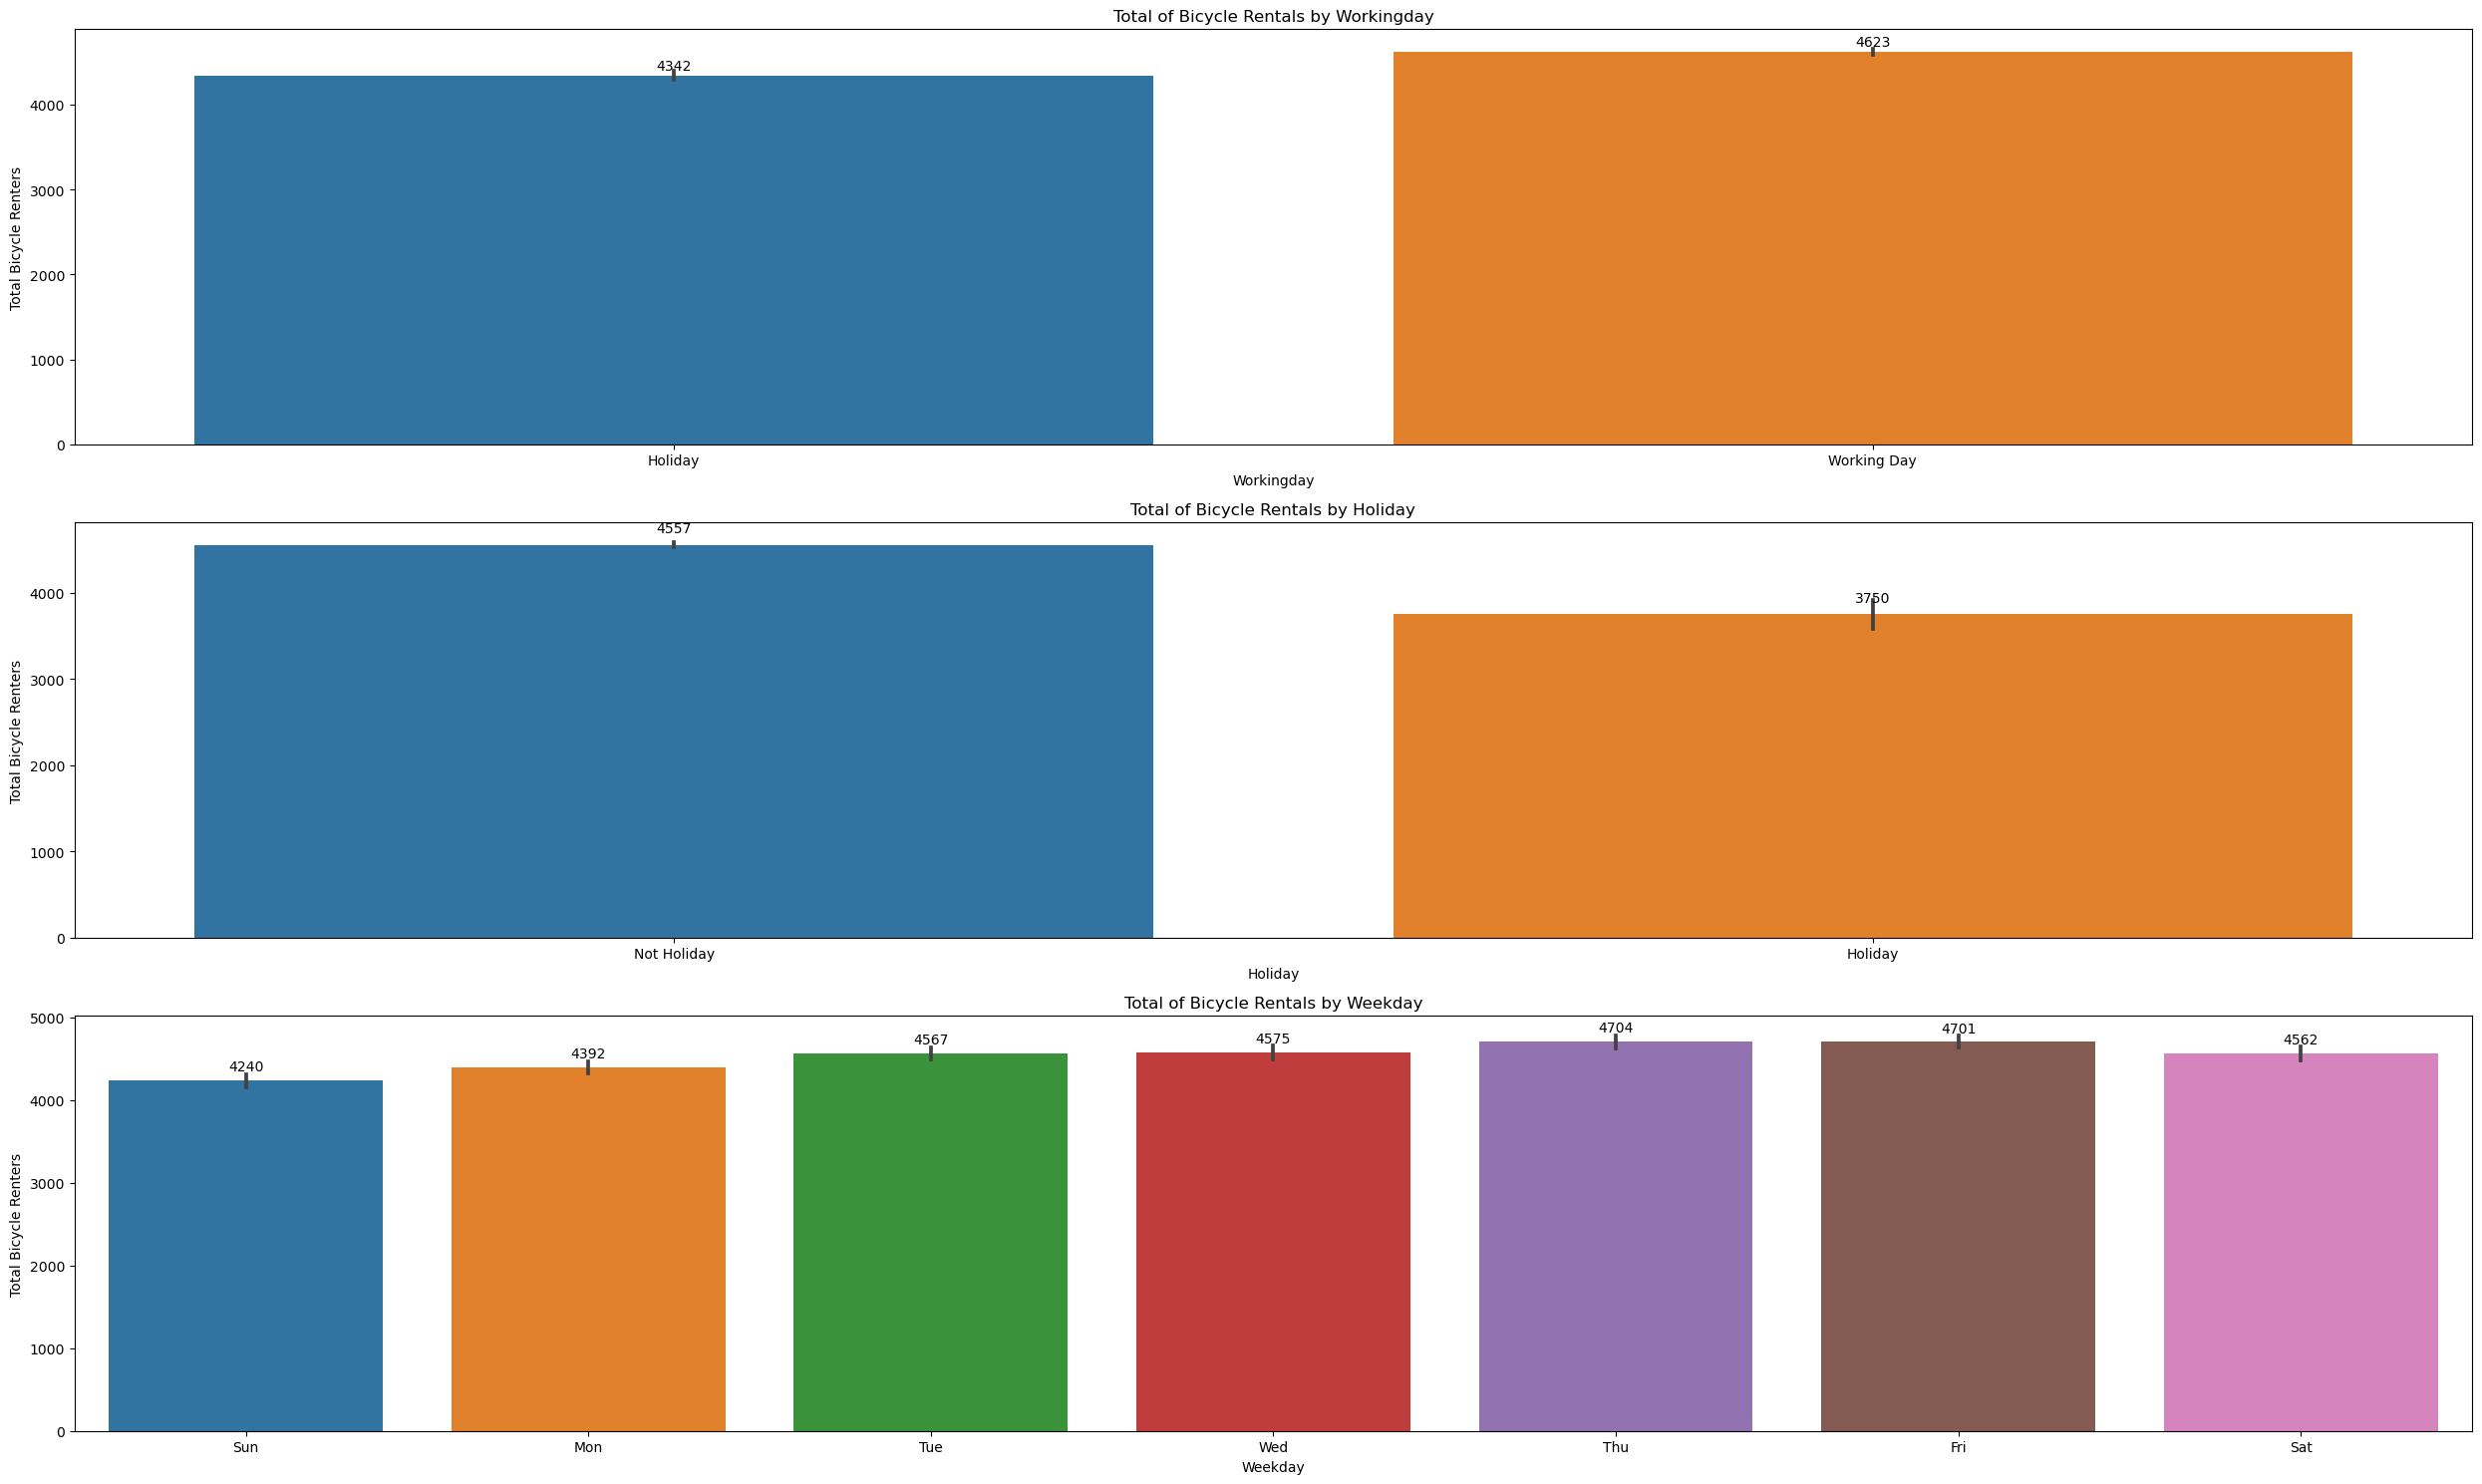

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25,15))

# Berdasarkan workingday
ax0 = sns.barplot(
    x='workingday',
    y='count',
    data=bike_sharing_df,
    ax=axes[0])
axes[0].set_title('Total of Bicycle Rentals by Workingday')
axes[0].set_xlabel('Workingday')
axes[0].set_ylabel('Total Bicycle Renters')

# Menambahkan nilai pada setiap bar di subplot pertama
for p in ax0.patches:
    ax0.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 7),
                textcoords='offset points')

# Berdasarkan holiday
ax0 = sns.barplot(
  x='holiday',
  y='count',
  data=bike_sharing_df,
  ax=axes[1])
axes[1].set_title('Total of Bicycle Rentals by Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Total Bicycle Renters')

# Menambahkan nilai pada setiap bar di subplot pertama
for p in ax0.patches:
    ax0.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 12),
                textcoords='offset points')

# Berdasarkan weekday
ax0 = sns.barplot(
  x='weekday',
  y='count',
  data=bike_sharing_df,
  ax=axes[2])
axes[2].set_title('Total of Bicycle Rentals by Weekday')
axes[2].set_xlabel('Weekday')
axes[2].set_ylabel('Total Bicycle Renters')

# Menambahkan nilai pada setiap bar di subplot pertama
for p in ax0.patches:
    ax0.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data diatas menggunakan barplot, didapat pernyataan sebagai berikut:

1. Jumlah penyewa sepeda lebih banyak pada hari kerja `workingday` (yakni senin - jumat) daripada akhir pekan `Holiday` (yakni sabtu dan minggu).
2. Jumlah penyewa sepeda jauh lebih banyak pada hari biasa (`Not Holiday`) dibandingkan hari libur (`Holiday`).
3. Jumlah penyewa sepeda pada hari **Kamis** ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari **Minggu** menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

### Pertanyaan 6: Bagaimana pengaruh variabel seperti temp,atemp, humidity, dan windspeed terhadap penyewaan sepeda (bike sharing)?

Koefisien Korelasi Pearson Temp: 0.6252323619601812
Koefisien Korelasi Pearson aTemp: 0.6290537604102988
Koefisien Korelasi Pearson Humidity: -0.0916571402909664
Koefisien Korelasi Pearson Windspeed: -0.23133980983271923


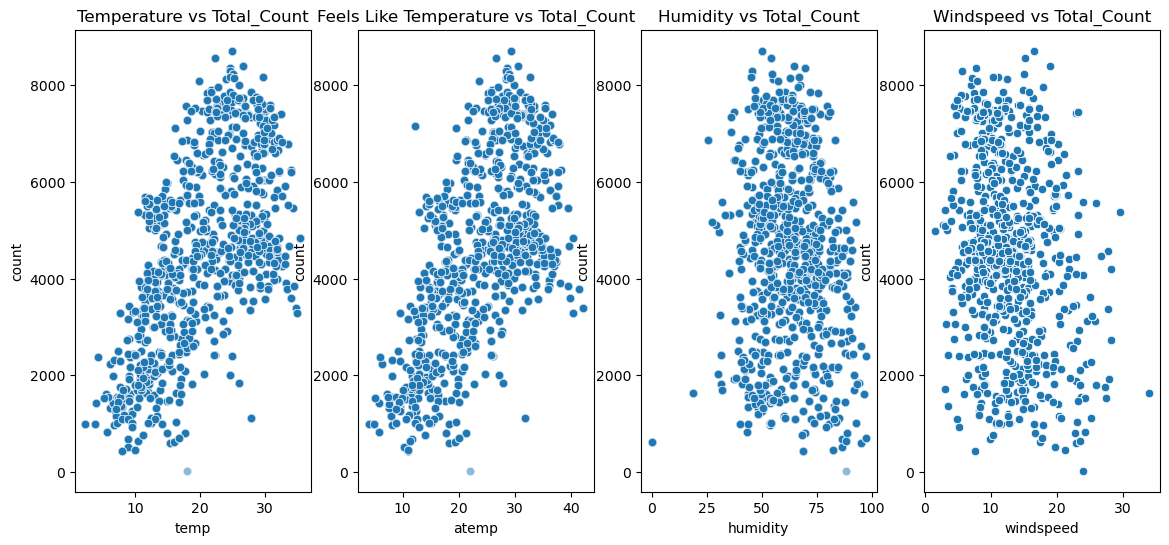

In [74]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'total_count'
plt.subplot(1, 4, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=bike_sharing_df,
    alpha=0.5
)
plt.title('Temperature vs Total_Count')

# Menghitung koefisien korelasi Pearson dan Spearman
correlation_pearson = bike_sharing_df["temp"].corr(bike_sharing_df["count"], method="pearson")
print(f"Koefisien Korelasi Pearson Temp: {correlation_pearson}")

# Scatter plot untuk 'atemp' vs 'total_count'
plt.subplot(1, 4, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=bike_sharing_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Total_Count')

# Menghitung koefisien korelasi Pearson dan Spearman
correlation_pearson = bike_sharing_df["atemp"].corr(bike_sharing_df["count"], method="pearson")
print(f"Koefisien Korelasi Pearson aTemp: {correlation_pearson}")

# Scatter plot untuk 'hum' vs 'total_count'
plt.subplot(1, 4, 3)
sns.scatterplot(
    x='humidity',
    y='count',
    data=bike_sharing_df,
    alpha=0.5
)
plt.title('Humidity vs Total_Count')

# Menghitung koefisien korelasi Pearson dan Spearman
correlation_pearson = bike_sharing_df["humidity"].corr(bike_sharing_df["count"], method="pearson")
print(f"Koefisien Korelasi Pearson Humidity: {correlation_pearson}")

# Scatter plot untuk 'windspeed' vs 'total_count'
plt.subplot(1, 4, 4)
sns.scatterplot(
    x='windspeed',
    y='count',
    data=bike_sharing_df,
)
plt.title('Windspeed vs Total_Count')

# Menghitung koefisien korelasi Pearson dan Spearman
correlation_pearson = bike_sharing_df["windspeed"].corr(bike_sharing_df["count"], method="pearson")
print(f"Koefisien Korelasi Pearson Windspeed: {correlation_pearson}")

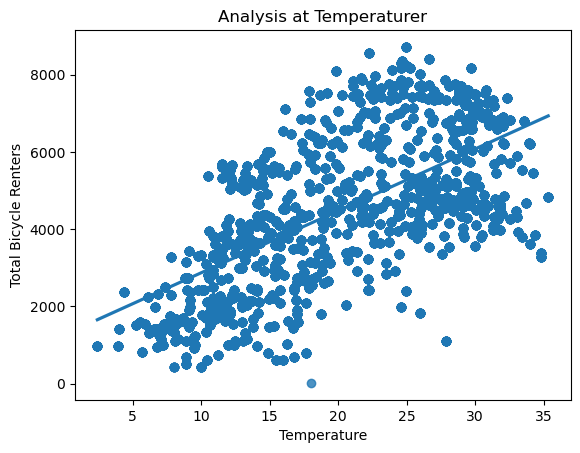

In [75]:
sns.regplot(x=bike_sharing_df['temp'], y=bike_sharing_df['count'])
plt.title('Analysis at Temperaturer')
plt.xlabel('Temperature')
plt.ylabel('Total Bicycle Renters')
plt.show()

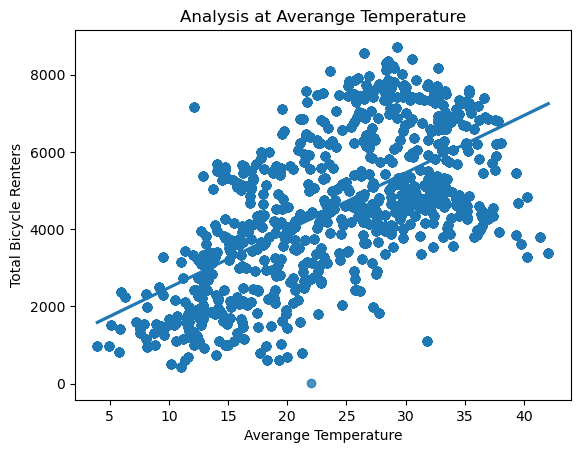

In [76]:
sns.regplot(x=bike_sharing_df['atemp'], y=bike_sharing_df['count'])
plt.title('Analysis at Averange Temperature')
plt.xlabel('Averange Temperature')
plt.ylabel('Total Bicycle Renters')
plt.show()

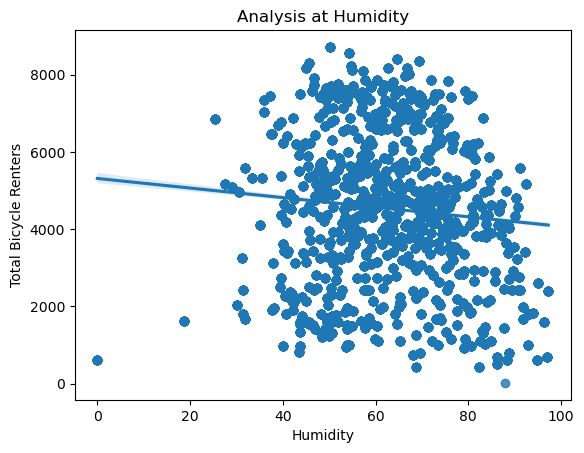

In [77]:
sns.regplot(x=bike_sharing_df['humidity'], y=bike_sharing_df['count'])
plt.title('Analysis at Humidity')
plt.xlabel('Humidity')
plt.ylabel('Total Bicycle Renters')
plt.show()

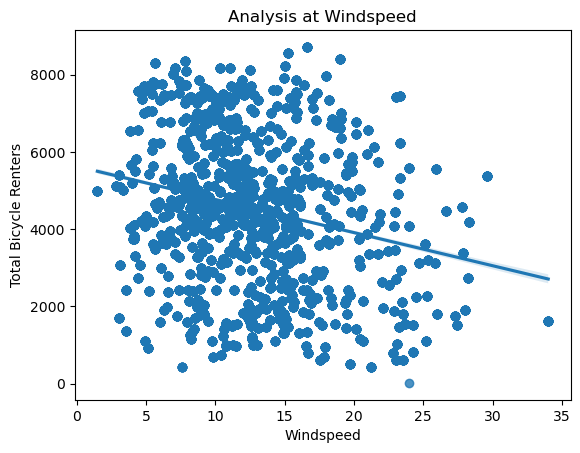

In [78]:
sns.regplot(x=bike_sharing_df['windspeed'], y=bike_sharing_df['count'])
plt.title('Analysis at Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Total Bicycle Renters')
plt.show()

Berdasarkan hasil analisis diatas menggunakan scatter plot, dapat kita tarik pernyataan sebagai berikut:

1. Hubungan antara temp dan total_count menunjukan korelasi yang positif diantara dua variabel.
2. Hubungan antara atemp dan total_count menunjukan korelasi yang positif diantara dua variabel.
3. Hubungan antara humidity dan total_count ternyata menunjukan korelasi negatif, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu banyak.
4. Hubungan antara windspeed dan total_count ternyata menunjukan korelasi yang sedikit negatif, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu banyak.
Kesimpulannya jika temperatur (temp dan atemp) meningkat, maka pengguna sepeda juga cenderung meningkat. Dan pengaruh dari humidity sangat kecil, walaupun cenderung dapat menurunkan jumlah pengguna sepeda. Untuk pengaruh dari windspeed juga dapat menurunkan banyaknya penyewa sepeda.

### Pertanyaan 7: Bagaimana tren penggunaan sepeda dalam setahun, apakah tahun 2011 atau 2012 yang lebih unggul?

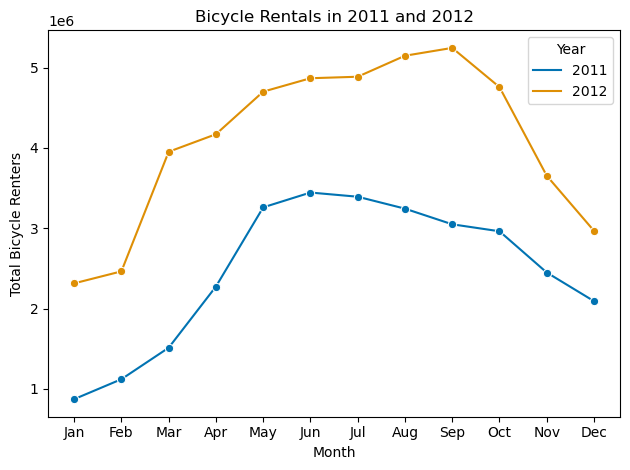

In [79]:
bike_sharing_df['month'] = pd.Categorical(bike_sharing_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

month_counts= bike_sharing_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=month_counts,
    x="month",
    y="count",
    hue="year",
    palette="colorblind",
    marker="o")

plt.title("Bicycle Rentals in 2011 and 2012")
plt.xlabel("Month")
plt.ylabel("Total Bicycle Renters")
plt.legend(title="Year", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa : 
1. Tahun 2012 menjadi tahun yang lebih unggul dengan puncak penyewaan sepeda terjadi pada bulan **September** lebih besar dari 5 jutaan
2. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan **Juni** sebesar 3 jutaan

<a id="Coclusion"></a>
<h2><b><span style="color:#005f26">🔶 Step 5 | </span><span style="color:#ff6200">Conclusion</span></b></h2>

* Conclusion pertanyaan 1: 
    1. Dapat terlihat jelas terdapat hubungan diantara keduanya. Para penyewa sepeda sangat menyukai ketika musim gugur `fall` dengan Q3 diatas 6000 dan Q1 lebih dari 4000 serta mediannya hampir 5000. 
    2. Lalu posisi kedua ditempati ketika musim panas `summer` dengan Q3 kurang lebih 6000 dan Q1 kurang lebih 4000 serta mediannya diatas 4000. 
    3. Posisi ketiga ditempati musim dingin `Winter` dengan Q3 diatas 5000 kurang dari 6000 dan Q1 lebih dari 3000 kurang dari 4000 serta mediannya hampir 5000. 
    4. Terakhir pengguna kurang menyukai ketika musim semi `Spring` dengan Q3 diatas 3000 kurang dari 4000 dan Q1 dibawah 2000 serta mediannya diatas 2000 kurrang dari 3000. 
    5. Mengapa pada musim `Spring` penyewa sepeda cenderung sedikit? Karena bisa saja sebagian orang mempunyai alergi serbuk sari dari bunga.

---

* Conclusion pertanyaan 2: 
    1. Dari visualisasi berdasarkan jam `hour` terhadap jumlah penyewa sepeda terhadap waktu libur maupun working day dapat dilihat untuk kategori `working day` total penyewa sepeda mulai naik pada pukul 2 sampai puncaknya pada pukul 4 pagi. Kemudian pukul 16 dan 17 atau jam 4 dan 5 sore sesuai dengan waaktu pulang dan pergi orang beraktivitas seperti bekerja. Untuk kategori `holiday` total penyewa sepeda mulai naik pada pukul 2 pagi sampai puncaknya pada pukul 5 pagi.

    2. Dari visualisasi berdasarkan hari `weekday`, bahwa setiap harinya pengguna Bike Sharing dengan tipe `registered user` memiliki jumlah **lebih banyak** dibandingkan pengguna dengan tipe `casual user`. Jika dilihat berdasarkan masing-masing jenis pengguna, pengguna dengan tipe `casual user` paling banyak pada hari Sabtu dengan total hampir mendekati 4.000.000 pengguna. Sedangkan pengguna tipe `registered_user` paling banyak pada hari Kamis dengan total lebih dari 10.000.000 pengguna.
    
    3. Dari visualisasi berdasarkan bulan `month`, bahwa penyewa sepeda dilihat dari `total_count` penyewa sepeda, bulan terbanyak jatuh pada bulan **Juni** dan **September** yakni sebanyak 5.772 penyewa sepeda. Untuk bulan dengan penyewa sepeda paling sedikit berada di bulan **Januari** yakni sebesar 2.228 penyewa sepeda.

---

* Conclusion pertanyaan 3: 
    1. Dari visualisasi Jumlah Penyewa Sepeda berdasarkan kondisi cuaca `wheater_condition`, bahwa penyewa sepeda jika dilihat pengguna `casual`atau pengguna biasa dan `registered` atau pengguna terdaftar lebih menyukai kondisi cuaca yang cerah **clear** dengan range 800 >= casual <= 1.000 penyewa dari `casual` dan range 3.500 >= registered <= 4.000 penyewa sepeda. dari `registered`.
    
    2. Untuk Jumlah Penyewa sedikit pada kondisi cuaca `weather_condition` pada **Light Snow** sebab jika dilihat dari segi keamanan sangat berbahaya karena jalan licin serta dari segi kenyamanan seperti `temperature` dan `windspeed` sangat mengganggu kenyamanan tubuh jika berada diluar.
    
---

* Conclusion pertanyaan 4 dan 5:
    Berdasarkan visualisasi data diatas menggunakan barplot, didapatlah kesimpulan sebagai berikut.
    1. Berdasarkan hari kerja `workingday`, jumlah penyewa sepeda lebih banyak pada hari kerja `workingday` yaitu sebesar 4.623 penyewa sepeda (Senin - Jumat) daripada akhir pekan `Holiday` yaitu sebesar 4.342 penyewa sepeda (Sabtu dan Minggu).
    2. Berdasarkan hari libur `holiday`, jumlah penyewa sepeda jauh lebih banyak pada hari biasa (`Not Holiday`) yaitu 4.557 penyewa sepeda dibandingkan hari libur (`Holiday`) yaitu 3.750 penyewa sepeda.
    3. Berdasarkan hari dalam seminggu `weekday`, jumlah penyewa sepeda pada hari **Kamis** ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak dengan jumlah 4.704 penyewa, dan hari **Minggu** menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit dengan jumlah 4.562 penyewa.

---

* Conclusion pertanyaan 6:
    Berdasarkan visualisasi diatas menggunakan scatter plot, didapatlah kesimpulan sebagai berikut.
    1. Hubungan antara `temp` dan `total_count` menunjukan korelasi yang **positif** diantara dua variabel.
    2. Hubungan antara `atemp` dan `total_count` menunjukan korelasi yang **positif** diantara dua variabel.
    3. Hubungan antara `humidity` dan `total_count` ternyata menunjukan **korelasi negatif**, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu banyak.
    4. Hubungan antara `windspeed` dan `total_count` menunjukan korelasi yang sedikit **negatif**, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu banyak.
    5. Kesimpulannya jika `temp` dan `atemp` meningkat, maka pengguna sepeda juga cenderung meningkat. Pengaruh dari `humidity` sangat kecil, walaupun cenderung dapat menurunkan jumlah penyewa sepeda. Untuk pengaruh dari `windspeed` juga dapat menurunkan banyaknya penyewa sepeda karena semakin tinggi `windspeed` maka menurunnya jumlah penyewa sepeda. Faktor lingkungan yang berpengaruh terhadap penggunaan *bike sharing* adalah suhu (`temp`), suhu rata-rata (`atemp`), kelembapan (`humidity`) dalam rentang 40-85%, dan kecepatan angin (`windspeed`) dalam rentang 3-20 knot

---

* Conclusion pertanyaan 7:
    Berdasarkan visualisasi diatas menggunakan lineplot, dapat disimpulkan bahwa : 
    1. Tahun 2012 menjadi tahun yang lebih unggul dengan puncak penyewaan sepeda terjadi pada bulan **September** lebih dari 5 juta penyewa
    2. Sedangkan pada tahun 2011 puncak penyewaan sepeda terjadi pada bulan **Juni** lebih dari 3 juta namun tidak lewat dari 4 juta penyewa.

<a id="Clean Dataset"></a>
<h2><b><span style="color:#005f26">🔶 Step 6 | </span><span style="color:#ff6200">Export Clean Dataset</span></b></h2>

In [80]:
bike_sharing_df.to_csv("dashboard/bike_data_clean.csv", index=False)

Kode di atas akan melakukan proses pengunduhan file dataset yang telah dibersihan *(cleaned dataset)* secara otomatis dengan cara menjalankan blok kode di atas.